In [72]:
import xgboost
import shap
import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np

In [110]:
def compare_val(row_num,if_median=True):
    pd.options.display.float_format = '{:.2f}'.format
    print('y is: ',y[row_num])
    print('y mean is: ',y.mean())
    if if_median:
        return pd.concat([X.loc[row_num,:], X.median(), (X.loc[row_num,:]-X.median())/X.median()*100],axis=1, names=['Series name', 'Row ID'])
    return pd.concat([X.loc[row_num,:], X.mean(), (X.loc[row_num,:]-X.mean())/X.median()*100],axis=1, names=['Series name', 'Row ID'])

In [2]:
# load JS visualization
shap.initjs()

In [122]:
# train XGBoost
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.05}, xgboost.DMatrix(X, label=y), 500)

[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_

[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 68 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 80 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=6
[12:54:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [103]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

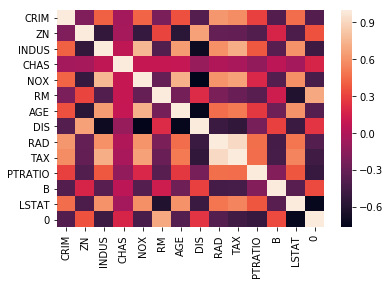

In [85]:
# plot correlation of columns
df = pd.concat([X,pd.Series(y)],axis=1)
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# y and LSTAT, INDUS are neg correlated
# y and RM are pos correlated

In [13]:
stats.describe(y)

DescribeResult(nobs=506, minmax=(5.0, 50.0), mean=22.532806324110677, variance=84.58672359409856, skewness=1.104810822864635, kurtosis=1.4686287722747462)

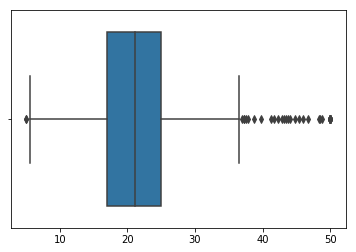

In [17]:
sns.boxplot(x=y)

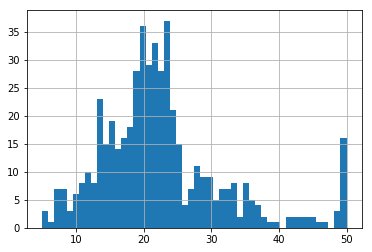

In [99]:
pd.Series(y).hist(bins=50)

In [126]:
# explain the model's prediction using shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
# how each feature contributing to push the model output from the base model to the model output
shap.force_plot(explainer.expected_value, shap_values[372,:], X.iloc[372,:])

In [127]:
compare_val(372)

y is:  50.0
y mean is:  22.532806324110677


,372,0,1
CRIM,8.27,0.26,3122.97
ZN,0.00,0.00,nan
INDUS,18.10,9.69,86.79
CHAS,1.00,0.00,inf
NOX,0.67,0.54,24.16
RM,5.88,6.21,-5.37
AGE,89.60,77.50,15.61
DIS,1.13,3.21,-64.78
RAD,24.00,5.00,380.00
TAX,666.00,330.00,101.82


[<matplotlib.lines.Line2D at 0x1a1fb46c18>]

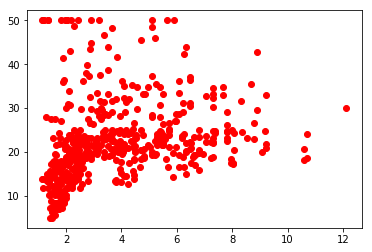

In [128]:
plt.plot(X.DIS, y, 'ro')

In [124]:
# visualize the dataset prediction
shap.force_plot(explainer.expected_value, shap_values,X)

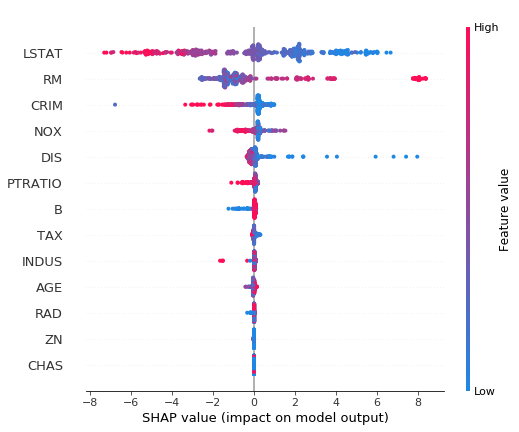

In [91]:
shap.summary_plot(shap_values,X)

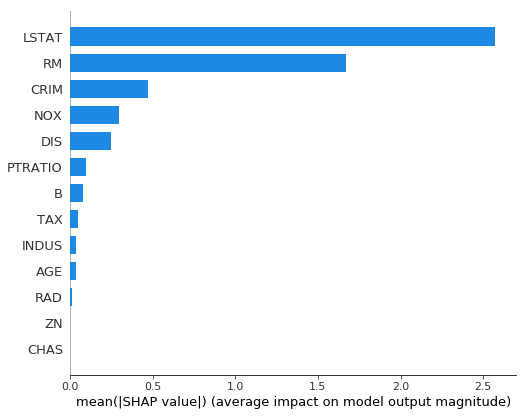

In [92]:
# take MAE
shap.summary_plot(shap_values,X,plot_type='bar')

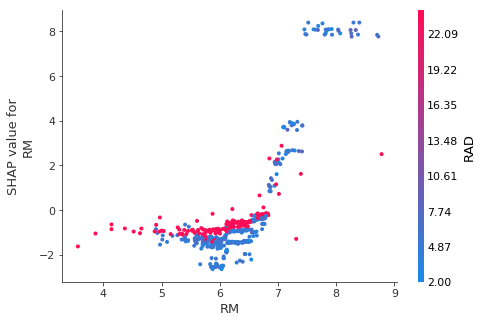

In [93]:
# to understand how a single feature effects the output of the model
# plot the SHAP values of that feaure vs. the value of that feature for all examples in a dataset
# SHAP values represent a feature's responsibility for a change in the model output
# the plot below represents the change in predicted house price as RM changes
shap.dependence_plot("RM", shap_values, X)
# Vertical dispersion at a singel value of RM represents iteraction effects with other features
# coloring: another feature that interacts with RM
# RAD: index of accessibility to radical highways

[<matplotlib.lines.Line2D at 0x1a1f1eb6d8>]

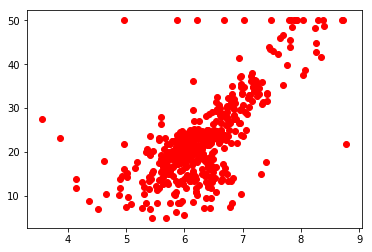

In [131]:
plt.plot(X.RM, y, 'ro')

In [129]:
X.RM.describe()

count   506.00
mean      6.28
std       0.70
min       3.56
25%       5.89
50%       6.21
75%       6.62
max       8.78
Name: RM, dtype: float64

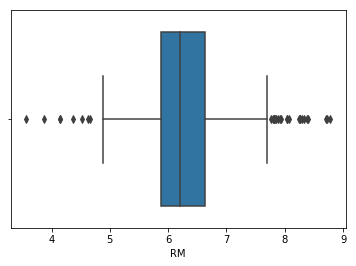

In [130]:
sns.boxplot(X.RM)

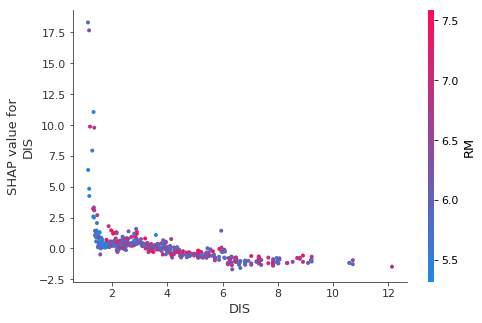

In [134]:
shap.dependence_plot("DIS", shap_values, X)


In [ ]:
# Deep learning example DeepExplainer (Tensorflow, Keras)

In [143]:
# mnist_cnn.py
# Trains a simple convnet on the MNIST dataset.
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [155]:
batch_size = 128
num_classes = 10
epochs = 12

In [145]:
# input image dimensions
img_rows, img_cols = 28, 28

In [141]:
# the data, split btw train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [147]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [148]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [149]:
# convert class vectors to binary calss matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [150]:
# create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])

In [156]:
model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:',score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 169s 3ms/step - loss: 0.2541 - acc: 0.9212 - val_loss: 0.0632 - val_acc: 0.9795
Epoch 2/12
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0866 - acc: 0.9737 - val_loss: 0.0444 - val_acc: 0.9858
Epoch 3/12
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0637 - acc: 0.9808 - val_loss: 0.0373 - val_acc: 0.9876
Epoch 4/12
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0520 - acc: 0.9844 - val_loss: 0.0328 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0463 - acc: 0.9862 - val_loss: 0.0397 - val_acc: 0.9879
Epoch 6/12
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0391 - acc: 0.9883 - val_loss: 0.0299 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 166s 3ms/step - loss: 0.0358 - acc: 0.9887 - val_loss: 0.0267 - 

In [157]:
#reference https://danzhuibing.github.io/tensorflow_hello.html
import tensorflow as tf
import numpy as np

In [ ]:
# Phase 1: Defaine the Computation Graph

In [158]:
# create data for linear regression
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

In [160]:
# define parameters to learn: W as slope, b as intercept
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [161]:
# define the liner regression model
y = W * x_data + b

In [163]:
# define loss function (objective function)
loss = tf.reduce_mean(tf.square(y - y_data))

In [164]:
# define training (Gradient Descent of loss func)
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [166]:
# define initializer of variables
init = tf.global_variables_initializer()

In [ ]:
# Phase 2: Carry out the Computation Graph

In [168]:
sess = tf.Session()
sess.run(init)

for step in range(501):
    # carry out the operation of updating parameters
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [-0.14484984] [0.57231766]
20 [0.02778] [0.33718878]
40 [0.08286383] [0.30882406]
60 [0.09593397] [0.30209377]
80 [0.09903522] [0.30049682]
100 [0.0997711] [0.30011788]
120 [0.09994567] [0.300028]
140 [0.09998712] [0.30000666]
160 [0.09999697] [0.3000016]
180 [0.09999929] [0.30000037]
200 [0.09999984] [0.3000001]
220 [0.0999999] [0.30000007]
240 [0.0999999] [0.30000007]
260 [0.0999999] [0.30000007]
280 [0.0999999] [0.30000007]
300 [0.0999999] [0.30000007]
320 [0.0999999] [0.30000007]
340 [0.0999999] [0.30000007]
360 [0.0999999] [0.30000007]
380 [0.0999999] [0.30000007]
400 [0.0999999] [0.30000007]
420 [0.0999999] [0.30000007]
440 [0.0999999] [0.30000007]
460 [0.0999999] [0.30000007]
480 [0.0999999] [0.30000007]
500 [0.0999999] [0.30000007]


In [169]:
import shap
import numpy as np

In [170]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

In [171]:
background.shape

(100, 28, 28, 1)

In [172]:
x_train.shape

(60000, 28, 28, 1)

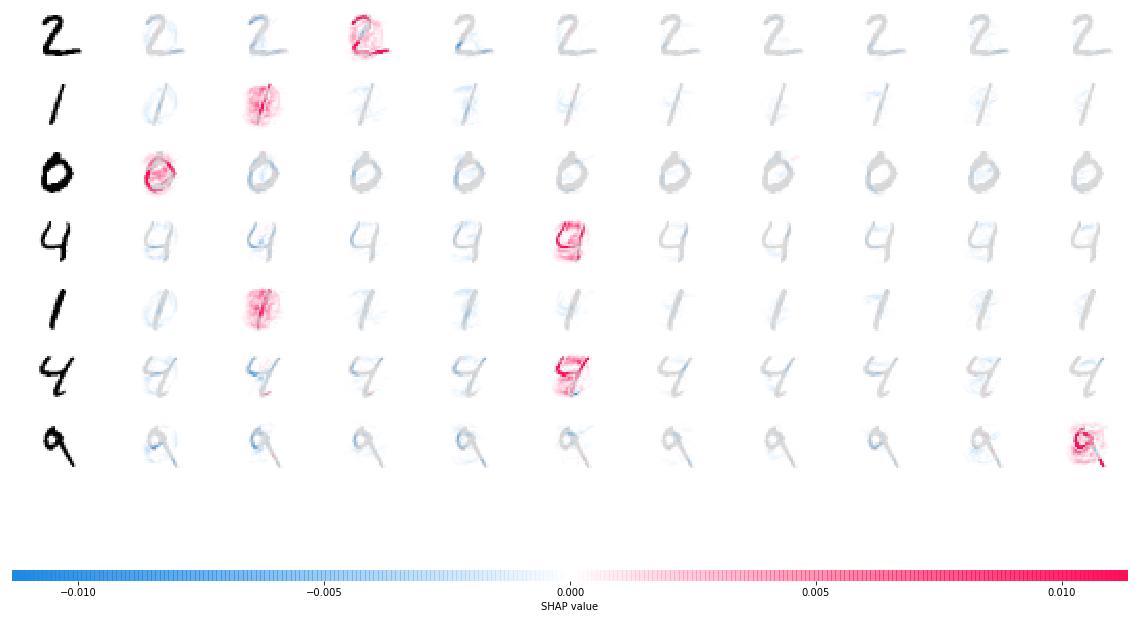

In [176]:
# explain the predictions of the model on four images
e = shap.DeepExplainer(model, background)
# or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[1].output), background)
shap_values = e.shap_values(x_test[1:8])

# plot the feature attributes
shap.image_plot(shap_values, -x_test[1:8])
# red - increase the model output, blue - decrease the model output
# the sum of the shap values equals the difference btw the
#      expected model output (averaged over the background dataset) and the
#      model output

In [174]:
help(shap.DeepExplainer)

Help on class DeepExplainer in module shap.explainers.deep:

class DeepExplainer(shap.explainers.explainer.Explainer)
 |  Meant to approximate SHAP values for deep learning models.
 |  
 |  This is an enhanced version of the DeepLIFT algorithm (Deep SHAP) where, similar to Kernel SHAP, we
 |  approximate the conditional expectations of SHAP values using a selection of background samples.
 |  Lundberg and Lee, NIPS 2017 showed that the per node attribution rules in DeepLIFT (Shrikumar,
 |  Greenside, and Kundaje, arXiv 2017) can be chosen to approximate Shapley values. By integrating
 |  over many backgound samples DeepExplainer estimates approximate SHAP values such that they sum
 |  up to the difference between the expected model output on the passed background samples and the
 |  current model output (f(x) - E[f(x)]).
 |  
 |  Method resolution order:
 |      DeepExplainer
 |      shap.explainers.explainer.Explainer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __in

In [178]:
# Gradient Explainer
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json
import shap

In [179]:
# load pre-trained model and choose two images to explain
model = VGG16(weights = 'imagenet', include_top=True)

553467904/553467096 [==============================] - 116s 0us/step


In [180]:
X, y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

In [184]:
# load ImageNet class name
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

In [188]:
# explain how the input to the nth layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input],[preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

In [189]:
# explainer
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X,7),
    local_smoothing = 0 #std of smoothing noise
)

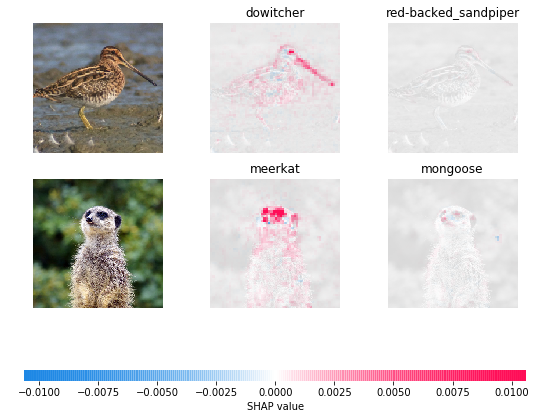

In [190]:
shap_values, indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)
# get the names for te classes
index_names = np.vectorize(lambda x : class_names[str(x)][1])(indexes)
# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

# red pixels represent positive SHAP values that increases the probability of the class
# while blue pixels represent negative probability of the class
